AS.430.271.81: M05 - Adam Thomas

# M05 Homework - Part II

In [2]:
import pandas as pd
import graphviz
from sklearn import metrics, model_selection, preprocessing, tree

Read the airline data only using specific columns.

In [6]:
df = pd.read_csv('allyears2k_headers.csv', usecols=['IsDepDelayed','DayofMonth','DayOfWeek'], encoding="utf-8")
df.head()

,DayofMonth,DayOfWeek,IsDepDelayed
0,14,3,YES
1,15,4,NO
2,17,6,YES
3,18,7,NO
4,19,1,YES


Check the data size and types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43978 entries, 0 to 43977
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DayofMonth    43978 non-null  int64 
 1   DayOfWeek     43978 non-null  int64 
 2   IsDepDelayed  43978 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


Use LabelEncoder **fit_transform** from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
to convert object classes to integer classes

In [8]:
le = preprocessing.LabelEncoder()

In [9]:
IsDepDelayed = pd.unique(df.IsDepDelayed)
df.IsDepDelayed = le.fit_transform(df.IsDepDelayed)
df.head()

,DayofMonth,DayOfWeek,IsDepDelayed
0,14,3,1
1,15,4,0
2,17,6,1
3,18,7,0
4,19,1,1


In [10]:
IsDepDelayed

array(['YES', 'NO'], dtype=object)

Extract independent (X) and dependent (y) variables.

In [11]:
X = df.iloc[:,:-1]  # Everything but the last column
y = df.iloc[:,-1]  # The last column

Create training (80%) and validation data (20%)

In [12]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Create a decision tree classifier using 'gini' method for information gain and set the max tree depth to 3.

In [18]:
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [19]:
dtc = dtc.fit(X_train, y_train)

Let's see how well we did

In [20]:
y_pred = dtc.predict(X_valid)
metrics.accuracy_score(y_pred, y_valid)

0.5866302864938608

Let's visualize the tree

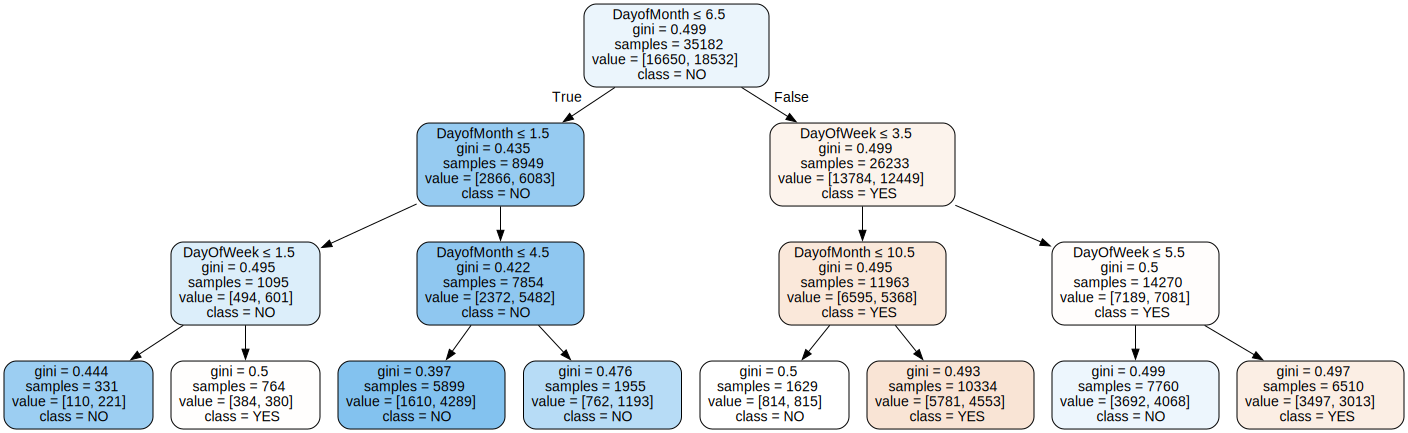

In [17]:
dot_data = tree.export_graphviz(dtc,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=IsDepDelayed,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Adjust the classifier parameters
Adjust the classifier parameters from above to see if we can improve the accuracy.

Create a decision tree classifier using 'entropy' method and set the max tree depth to 4.

In [21]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)
dtc = dtc.fit(X_train, y_train)

Let's see how well we did

In [22]:
y_pred = dtc.predict(X_valid)
metrics.accuracy_score(y_pred, y_valid)

0.5871987266939518

Let's visualize the tree

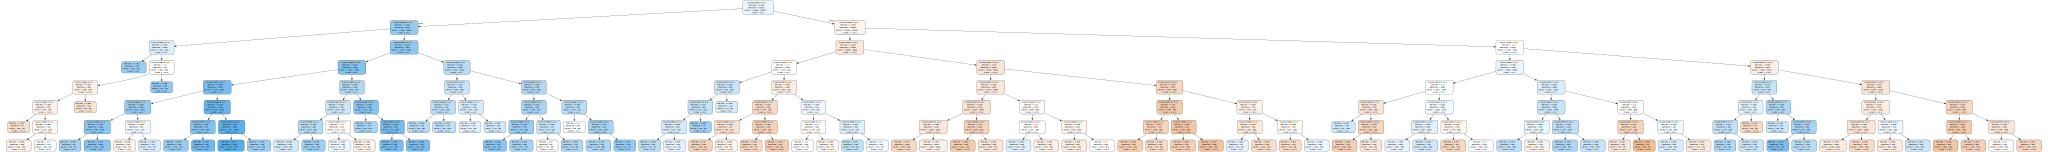

In [23]:
dot_data = tree.export_graphviz(dtc,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=IsDepDelayed,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

From the results above, it is clear that the day of month and day of week do not seem to have any correlated effect on the outcome of whether a flight departure is delayed.

Two different classifier types both resulted in accuracy little over 50%, which suggests that the independent variables chosen for the model are random, much like a coin flip.